# 1-3. [과제] 한국거래소 주식 클러스터링

이 데이터셋은 `yfinance` 라이브러리를 사용하여 2023년 1월 1일부터 2024년 1월 1일까지의 기간 동안<br> 한국거래소(KRX)의 대표적인 30개 주식 종목의 일별 데이터를 포함하고 있습니다.<br>
부족한 정보를 채우기 위해 `FinanceDataReader`를 같이 불러왔습니다.


In [ ]:
!pip install finance-datareader

In [ ]:
import FinanceDataReader as fdr

# KRX 전체 종목 리스트 불러오기
stock_list = fdr.StockListing('KRX')

stock_list.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,78000,1,500,0.65,77600,78600,77300,18799678,1467253762796,465643038900000,5969782550,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,173600,2,-600,-0.34,169000,174700,169000,3146625,542519794235,126381210564000,728002365,STK
2,373220,KR7373220003,LG에너지솔루션,KOSPI,,389000,3,0,0.00,385000,392000,381000,120887,47058559000,91026000000000,234000000,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,775000,2,-6000,-0.77,777000,783000,774000,48413,37604401000,55159850000000,71174000,STK
4,005935,KR7005931001,삼성전자우,KOSPI,,65000,2,-200,-0.31,65000,65500,64600,744001,48445166100,53487635500000,822886700,STK


In [ ]:
stock_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Code         2805 non-null   object 
 1   ISU_CD       2805 non-null   object 
 2   Name         2805 non-null   object 
 3   Market       2805 non-null   object 
 4   Dept         2805 non-null   object 
 5   Close        2805 non-null   object 
 6   ChangeCode   2805 non-null   object 
 7   Changes      2805 non-null   int64  
 8   ChagesRatio  2805 non-null   float64
 9   Open         2805 non-null   int64  
 10  High         2805 non-null   int64  
 11  Low          2805 non-null   int64  
 12  Volume       2805 non-null   int64  
 13  Amount       2805 non-null   int64  
 14  Marcap       2805 non-null   int64  
 15  Stocks       2805 non-null   int64  
 16  MarketId     2805 non-null   object 
dtypes: float64(1), int64(8), object(8)
memory usage: 372.7+ KB


In [ ]:
import yfinance as yf #Yahoo Finance에서 주식 데이터를 가져오는데 사용
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler #데이터 표준화를 위해 사용
from sklearn.decomposition import PCA #주성분 분석 라이브러리
from sklearn.cluster import KMeans #K-평균 군집화 알고리즘을 위한 클래스
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
tickers = [
    "005930.KS", "000660.KS", "051910.KS", "035420.KS", "068270.KS", "005380.KS", "207940.KS", "005490.KS",
    "028260.KS", "035720.KS", "012330.KS", "096770.KS", "066570.KS", "051900.KS", "017670.KS", "105560.KS",
    "055550.KS", "034730.KS", "015760.KS", "018260.KS", "032830.KS", "033780.KS", "003550.KS", "090430.KS",
    "000270.KS", "000810.KS", "036570.KS", "086790.KS", "010950.KS", "251270.KS"
]  # 대표적인 KRX 종목들

#yf.download 함수를 사용해서 tickers 목록에 있는 종목들에 대한 주식 데이터 다운로드 및 기간 설정
data = yf.download(tickers, start="2023-01-01", end="2024-01-01")

[*********************100%%**********************]  30 of 30 completed


In [ ]:
data.head()

Price       Adj Close                                             \
Ticker      000270.KS     000660.KS      000810.KS     003550.KS   
Date                                                               
2023-01-02  58809.375  74763.960938  185182.640625  73910.757812   
2023-01-03  59670.000  74665.195312  184706.593750  72849.375000   
2023-01-04  59287.500  79998.414062  185658.687500  73621.289062   
2023-01-05  58426.875  80393.476562  186134.734375  73814.265625   
2023-01-06  58809.375  82072.460938  194227.546875  74103.734375   

Price                                                                \
Ticker          005380.KS     005490.KS     005930.KS     010950.KS   
Date                                                                  
2023-01-02  147975.312500  265465.12500  54363.421875  82556.828125   
2023-01-03  149860.343750  265465.12500  54265.472656  80861.820312   
2023-01-04  151274.109375  267905.09375  56616.320312  78568.578125   
2023-01-05  149860.343750  271809.00000  57008.128906  77372.101562   
2023-01-06  150331.593750  279128.78125  57791.750000  78070.046875   

Price                                ...    Volume                      \
Ticker          012330.KS 015760.KS  ... 051910.KS 055550.KS 066570.KS   
Date                                 ...                                 
2023-01-02  198970.437500   19350.0  ...    108253    660649    256377   
2023-01-03  198479.156250   19500.0  ...    112173    863125    535289   
2023-01-04  199461.718750   19550.0  ...    129672   1087924    582484   
2023-01-05  203392.000000   19800.0  ...    190445   3871736    372671   
2023-01-06  210269.984375   19500.0  ...    135877   2806312    520258   

Price                                                                   \
Ticker     068270.KS 086790.KS 090430.KS 096770.KS 105560.KS 207940.KS   
Date                                                                     
2023-01-02    290850    712637    297502    186127    547689     33010   
2023-01-03    313306    909855    179098    354535   1031515     71420   
2023-01-04    272316   1262005    209432    288040   1083324     72399   
2023-01-05    290217   2604951    253308    256005   2515852     50188   
2023-01-06    230828   2573663    165864    195371   2935706     41149   

Price                 
Ticker     251270.KS  
Date                  
2023-01-02    940006  
2023-01-03    670123  
2023-01-04    587739  
2023-01-05    730291  
2023-01-06    392381  

[5 rows x 180 columns]

In [ ]:
# MultiIndex 컬럼을 stack으로 행으로 변환
stacked_data = data.stack(level=1)  # 티커 레벨을 행으로 변환

print(stacked_data)

Price                     Adj Close     Close      High       Low      Open  \
Date       Ticker                                                             
2023-01-02 000270.KS   58809.375000   61500.0   62400.0   60500.0   60600.0   
           000660.KS   74763.960938   75700.0   76700.0   75000.0   75100.0   
           000810.KS  185182.640625  194500.0  201000.0  194500.0  200500.0   
           003550.KS   73910.757812   76600.0   79300.0   76600.0   79300.0   
           005380.KS  147975.312500  157000.0  161000.0  154000.0  154000.0   
...                             ...       ...       ...       ...       ...   
2023-12-28 090430.KS  145000.000000  145000.0  145000.0  138200.0  139000.0   
           096770.KS  140300.000000  140300.0  140300.0  138500.0  139000.0   
           105560.KS   52173.878906   54100.0   54100.0   52500.0   52700.0   
           207940.KS  760000.000000  760000.0  760000.0  727000.0  729000.0   
           251270.KS   58100.000000   58100.0   5810

In [ ]:
# Reset index를 통해 tidy data 형태로 변환 (Ticker 칼럼과 Date 칼럼으로 변환)
tidy_data = stacked_data.reset_index().rename(columns={'level_1': 'Ticker', 'Date': 'Date'})

# 결과 확인
tidy_data.head()

Price,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2023-01-02,000270.KS,58809.375000,61500.0,62400.0,60500.0,60600.0,1548935
1,2023-01-02,000660.KS,74763.960938,75700.0,76700.0,75000.0,75100.0,1376985
2,2023-01-02,000810.KS,185182.640625,194500.0,201000.0,194500.0,200500.0,51688
3,2023-01-02,003550.KS,73910.757812,76600.0,79300.0,76600.0,79300.0,110530
4,2023-01-02,005380.KS,147975.312500,157000.0,161000.0,154000.0,154000.0,1132256


In [ ]:
tidy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7350 entries, 0 to 7349
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       7350 non-null   datetime64[ns]
 1   Ticker     7350 non-null   object        
 2   Adj Close  7350 non-null   float64       
 3   Close      7350 non-null   float64       
 4   High       7350 non-null   float64       
 5   Low        7350 non-null   float64       
 6   Open       7350 non-null   float64       
 7   Volume     7350 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 459.5+ KB


## 과제 설명

다음 내용에 대해서 코드를 작성하고, 각자 노션으로 정리해 Slack으로 링크를 제출합니다. `#24s-ai-study` 채널을 만들어둘게요.<br>
**과제 기한: 5월 2일(목) 오전 11시**<br>
**상호 피드백 기한: 5월 2일(목) 오후 10시**

---
1. `tidy_data`에는 종목명이 나타나 있지 않습니다. `stock_list`에서 `Name`을 찾아 `tidy_data`정보를 병합합니다.
2. `pandas`의 `groupby` 함수를 활용해 Ticker 별로 1년치 평균값을 계산합니다.
3. 상관관계를 확인할 수 있는 `seaborn`의 `pairplot`으로 플롯을 그린 뒤, 두 개의 변수를 선정합니다. 단, 변수 선정에는 반드시 이유가 필요합니다.
4. 두 개의 변수를 기준으로 K-Means와 DBSCAN을 모두 활용하여 클러스터링합니다. 두 클러스터 중 어떤 클러스터를 선택할 것인지 결정합니다.
5. 클러스터별 기초 통계량을 구하고, `seaborn` `boxplot`으로 시각화합니다.
6. (선택) 모든 변수를 t-SNE로 시각화하여 클러스터별 특성을 대략적으로 파악합니다.
---

`조건` **ChatGPT는 활용하지 않습니다.** 필요한 정보는 구글링하여 블로그나 관련 글을 찾아서 작성합니다.<br>
찾아본 내용에 대해선 노션 콜아웃으로 정리하며, 찾아본 블로그 글의 원문 링크도 북마크로 추가합니다.

1. tidy_data에는 종목명이 나타나 있지 않습니다. stock_list에서 Name을 찾아 tidy_data정보를 병합합니다.

In [ ]:
stock_list.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,78000,1,500,0.65,77600,78600,77300,18799678,1467253762796,465643038900000,5969782550,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,173600,2,-600,-0.34,169000,174700,169000,3146625,542519794235,126381210564000,728002365,STK
2,373220,KR7373220003,LG에너지솔루션,KOSPI,,389000,3,0,0.00,385000,392000,381000,120887,47058559000,91026000000000,234000000,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,775000,2,-6000,-0.77,777000,783000,774000,48413,37604401000,55159850000000,71174000,STK
4,005935,KR7005931001,삼성전자우,KOSPI,,65000,2,-200,-0.31,65000,65500,64600,744001,48445166100,53487635500000,822886700,STK


In [ ]:
#stock_list에서 필요한 정보 추출, 리스트 인덱싱 활용
stock_list = stock_list[['Code','Name']].copy(); stock_list

,Code,Name
0,005930,삼성전자
1,000660,SK하이닉스
2,373220,LG에너지솔루션
3,207940,삼성바이오로직스
4,005935,삼성전자우
...,...,...
2800,413300,티엘엔지니어링
2801,217320,썬테크
2802,245450,씨앤에스링크
2803,030790,비케이탑스


In [ ]:
# 중복값 있는지 확인
stock_list.duplicated(subset = ['Code'])

0       False
1       False
2       False
3       False
4       False
        ...  
2800    False
2801    False
2802    False
2803    False
2804    False
Length: 2805, dtype: bool

In [ ]:
# 중복값 확인 및 제거
stock_list.drop_duplicates(subset = ['Code'], inplace = True)

In [ ]:
# 칼럼명 변경
stock_list.columns = ['Ticker', 'Name'] ; stock_list

,Ticker,Name
0,005930,삼성전자
1,000660,SK하이닉스
2,373220,LG에너지솔루션
3,207940,삼성바이오로직스
4,005935,삼성전자우
...,...,...
2800,413300,티엘엔지니어링
2801,217320,썬테크
2802,245450,씨앤에스링크
2803,030790,비케이탑스


In [ ]:
tidy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7350 entries, 0 to 7349
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       7350 non-null   datetime64[ns]
 1   Ticker     7350 non-null   object        
 2   Adj Close  7350 non-null   float64       
 3   Close      7350 non-null   float64       
 4   High       7350 non-null   float64       
 5   Low        7350 non-null   float64       
 6   Open       7350 non-null   float64       
 7   Volume     7350 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 459.5+ KB


In [ ]:
tidy_data.head()

Price,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2023-01-02,000270.KS,58809.375000,61500.0,62400.0,60500.0,60600.0,1548935
1,2023-01-02,000660.KS,74763.960938,75700.0,76700.0,75000.0,75100.0,1376985
2,2023-01-02,000810.KS,185182.640625,194500.0,201000.0,194500.0,200500.0,51688
3,2023-01-02,003550.KS,73910.757812,76600.0,79300.0,76600.0,79300.0,110530
4,2023-01-02,005380.KS,147975.312500,157000.0,161000.0,154000.0,154000.0,1132256


In [ ]:
#병합을 위해 tidy_data 전처리
tidy_data['Ticker'] = tidy_data['Ticker'].str.replace('.KS', '').str[:6]

tidy_data

Price,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2023-01-02,000270,58809.375000,61500.0,62400.0,60500.0,60600.0,1548935
1,2023-01-02,000660,74763.960938,75700.0,76700.0,75000.0,75100.0,1376985
2,2023-01-02,000810,185182.640625,194500.0,201000.0,194500.0,200500.0,51688
3,2023-01-02,003550,73910.757812,76600.0,79300.0,76600.0,79300.0,110530
4,2023-01-02,005380,147975.312500,157000.0,161000.0,154000.0,154000.0,1132256
...,...,...,...,...,...,...,...,...
7345,2023-12-28,090430,145000.000000,145000.0,145000.0,138200.0,139000.0,295066
7346,2023-12-28,096770,140300.000000,140300.0,140300.0,138500.0,139000.0,325192
7347,2023-12-28,105560,52173.878906,54100.0,54100.0,52500.0,52700.0,1211536
7348,2023-12-28,207940,760000.000000,760000.0,760000.0,727000.0,729000.0,132038


In [ ]:
# 데이터 병합
df = pd.merge(stock_list, tidy_data, on = 'Ticker') ; df

,Ticker,Name,Date,Adj Close,Close,High,Low,Open,Volume
0,005930,삼성전자,2023-01-02,54363.421875,55500.0,56100.0,55200.0,55500.0,10031448
1,005930,삼성전자,2023-01-03,54265.472656,55400.0,56000.0,54500.0,55400.0,13547030
2,005930,삼성전자,2023-01-04,56616.320312,57800.0,58000.0,55600.0,55700.0,20188071
3,005930,삼성전자,2023-01-05,57008.128906,58200.0,58800.0,57600.0,58200.0,15682826
4,005930,삼성전자,2023-01-06,57791.750000,59000.0,59400.0,57900.0,58300.0,17334989
...,...,...,...,...,...,...,...,...,...
7345,036570,엔씨소프트,2023-12-21,236889.437500,240000.0,243500.0,235000.0,235000.0,108308
7346,036570,엔씨소프트,2023-12-22,232941.281250,236000.0,243500.0,233500.0,240500.0,136172
7347,036570,엔씨소프트,2023-12-26,238370.000000,241500.0,243000.0,237500.0,240000.0,129257
7348,036570,엔씨소프트,2023-12-27,241000.000000,241000.0,242500.0,235500.0,239000.0,82326


2. pandas의 groupby 함수를 활용해 Ticker 별로 1년치 평균값을 계산합니다.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7350 entries, 0 to 7349
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Ticker     7350 non-null   object        
 1   Name       7350 non-null   object        
 2   Date       7350 non-null   datetime64[ns]
 3   Adj Close  7350 non-null   float64       
 4   Close      7350 non-null   float64       
 5   High       7350 non-null   float64       
 6   Low        7350 non-null   float64       
 7   Open       7350 non-null   float64       
 8   Volume     7350 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 516.9+ KB


In [ ]:
# 일별 수익률 계산 후 칼럼에 추가
df['Returns'] = df['Adj Close'].pct_change()*100

# 변동성 기간 설정
window = 20

# 변동성 계산 후 칼럼에 추가
df['Volatility'] = df['Returns'].rolling(window).std()*np.sqrt(window)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7330 entries, 20 to 7349
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Ticker      7330 non-null   object        
 1   Name        7330 non-null   object        
 2   Date        7330 non-null   datetime64[ns]
 3   Adj Close   7330 non-null   float64       
 4   Close       7330 non-null   float64       
 5   High        7330 non-null   float64       
 6   Low         7330 non-null   float64       
 7   Open        7330 non-null   float64       
 8   Volume      7330 non-null   int64         
 9   Returns     7330 non-null   float64       
 10  Volatility  7330 non-null   float64       
 11  Cluster     7330 non-null   int64         
dtypes: datetime64[ns](1), float64(7), int64(2), object(2)
memory usage: 744.5+ KB


In [ ]:
# Ticker를 기준으로 그룹화한 후 평균값 계산
# https://kongdols-room.tistory.com/168

grouped_data = df.groupby('Ticker').agg({
    'Name': 'first',
    'Adj Close': 'mean',
    'Close': 'mean',
    'High': 'mean',
    'Low': 'mean',
    'Open': 'mean',
    'Volume': 'mean',
    'Returns': 'mean',
    'Volatility':'mean'
})

# 결과 출력
print(grouped_data)


            Name      Adj Close          Close           High            Low  \
Ticker                                                                         
000270        기아   77312.227041   80849.387755   81693.061224   79907.755102   
000660    SK하이닉스  107466.581091  108260.000000  109677.551020  106734.693878   
000810      삼성화재  222238.591582  233420.408163  236263.265306  230112.653061   
003550        LG   81490.278348   84430.204082   85401.632653   83371.020408   
005380       현대차  177633.812500  187394.693878  189117.551020  185635.102041   
005490  POSCO홀딩스  423422.007526  429004.081633  438457.142857  420761.224490   
005930      삼성전자   66642.816486   67455.510204   67981.632653   66936.734694   
010950     S-Oil   75117.722513   75232.244898   76081.224490   74485.306122   
012330     현대모비스  220878.266327  224289.795918  226810.204082  221769.387755   
015760      한국전력   18620.612245   18620.612245   18836.326531   18450.163265   
017670     SK텔레콤   45310.211543   48162.

In [ ]:
#min-max 정규화 진행
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# Name 열을 제외한 모든 수치형 열에 대해 정규화 진행
numeric_columns = grouped_data.select_dtypes(include=['float64', 'int64']).columns
grouped_data[numeric_columns] = scaler.fit_transform(grouped_data[numeric_columns])

# 결과 출력
print(grouped_data)


            Name  Adj Close     Close      High       Low      Open    Volume  \
Ticker                                                                          
000270        기아   0.078957  0.083716  0.083747  0.083361  0.083490  0.084291   
000660    SK하이닉스   0.119524  0.120591  0.121033  0.119749  0.120444  0.256523   
000810      삼성화재   0.273925  0.288968  0.289690  0.287098  0.288327  0.001896   
003550        LG   0.084578  0.088533  0.088689  0.088058  0.088296  0.012102   
005380       현대차   0.213919  0.227050  0.226875  0.226769  0.226705  0.035814   
005490  POSCO홀딩스   0.544575  0.552085  0.559083  0.545693  0.551353  0.086785   
005930      삼성전자   0.064604  0.065697  0.065479  0.065767  0.065680  1.000000   
010950     S-Oil   0.076005  0.076159  0.076270  0.076006  0.076253  0.019600   
012330     현대모비스   0.272095  0.276685  0.277095  0.275781  0.276325  0.008879   
015760      한국전력   0.000000  0.000000  0.000000  0.000000  0.000000  0.089888   
017670     SK텔레콤   0.035905 

In [ ]:
grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 000270 to 251270
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        30 non-null     object 
 1   Adj Close   30 non-null     float64
 2   Close       30 non-null     float64
 3   High        30 non-null     float64
 4   Low         30 non-null     float64
 5   Open        30 non-null     float64
 6   Volume      30 non-null     float64
 7   Returns     30 non-null     float64
 8   Volatility  30 non-null     float64
dtypes: float64(8), object(1)
memory usage: 2.3+ KB


3. 상관관계를 확인할 수 있는 seaborn의 pairplot으로 플롯을 그린 뒤, 두 개의 변수를 선정합니다. 단, 변수 선정에는 반드시 이유가 필요합니다.

In [ ]:
# 기본적으로 필요한 라이브러리를 불러오기
from matplotlib import font_manager, rc, rcParams
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 한글 폰트 설치
# 이 셀을 실행시키고 '런타임 > 세션 다시 시작'을 해주세요

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
# 시각화 설정

# Seaborn에서 기본 스타일 지정
sns.set_theme(font = 'NanumGothic',
              rc = {'axes.unicode_minus' : False},
              style = 'whitegrid')

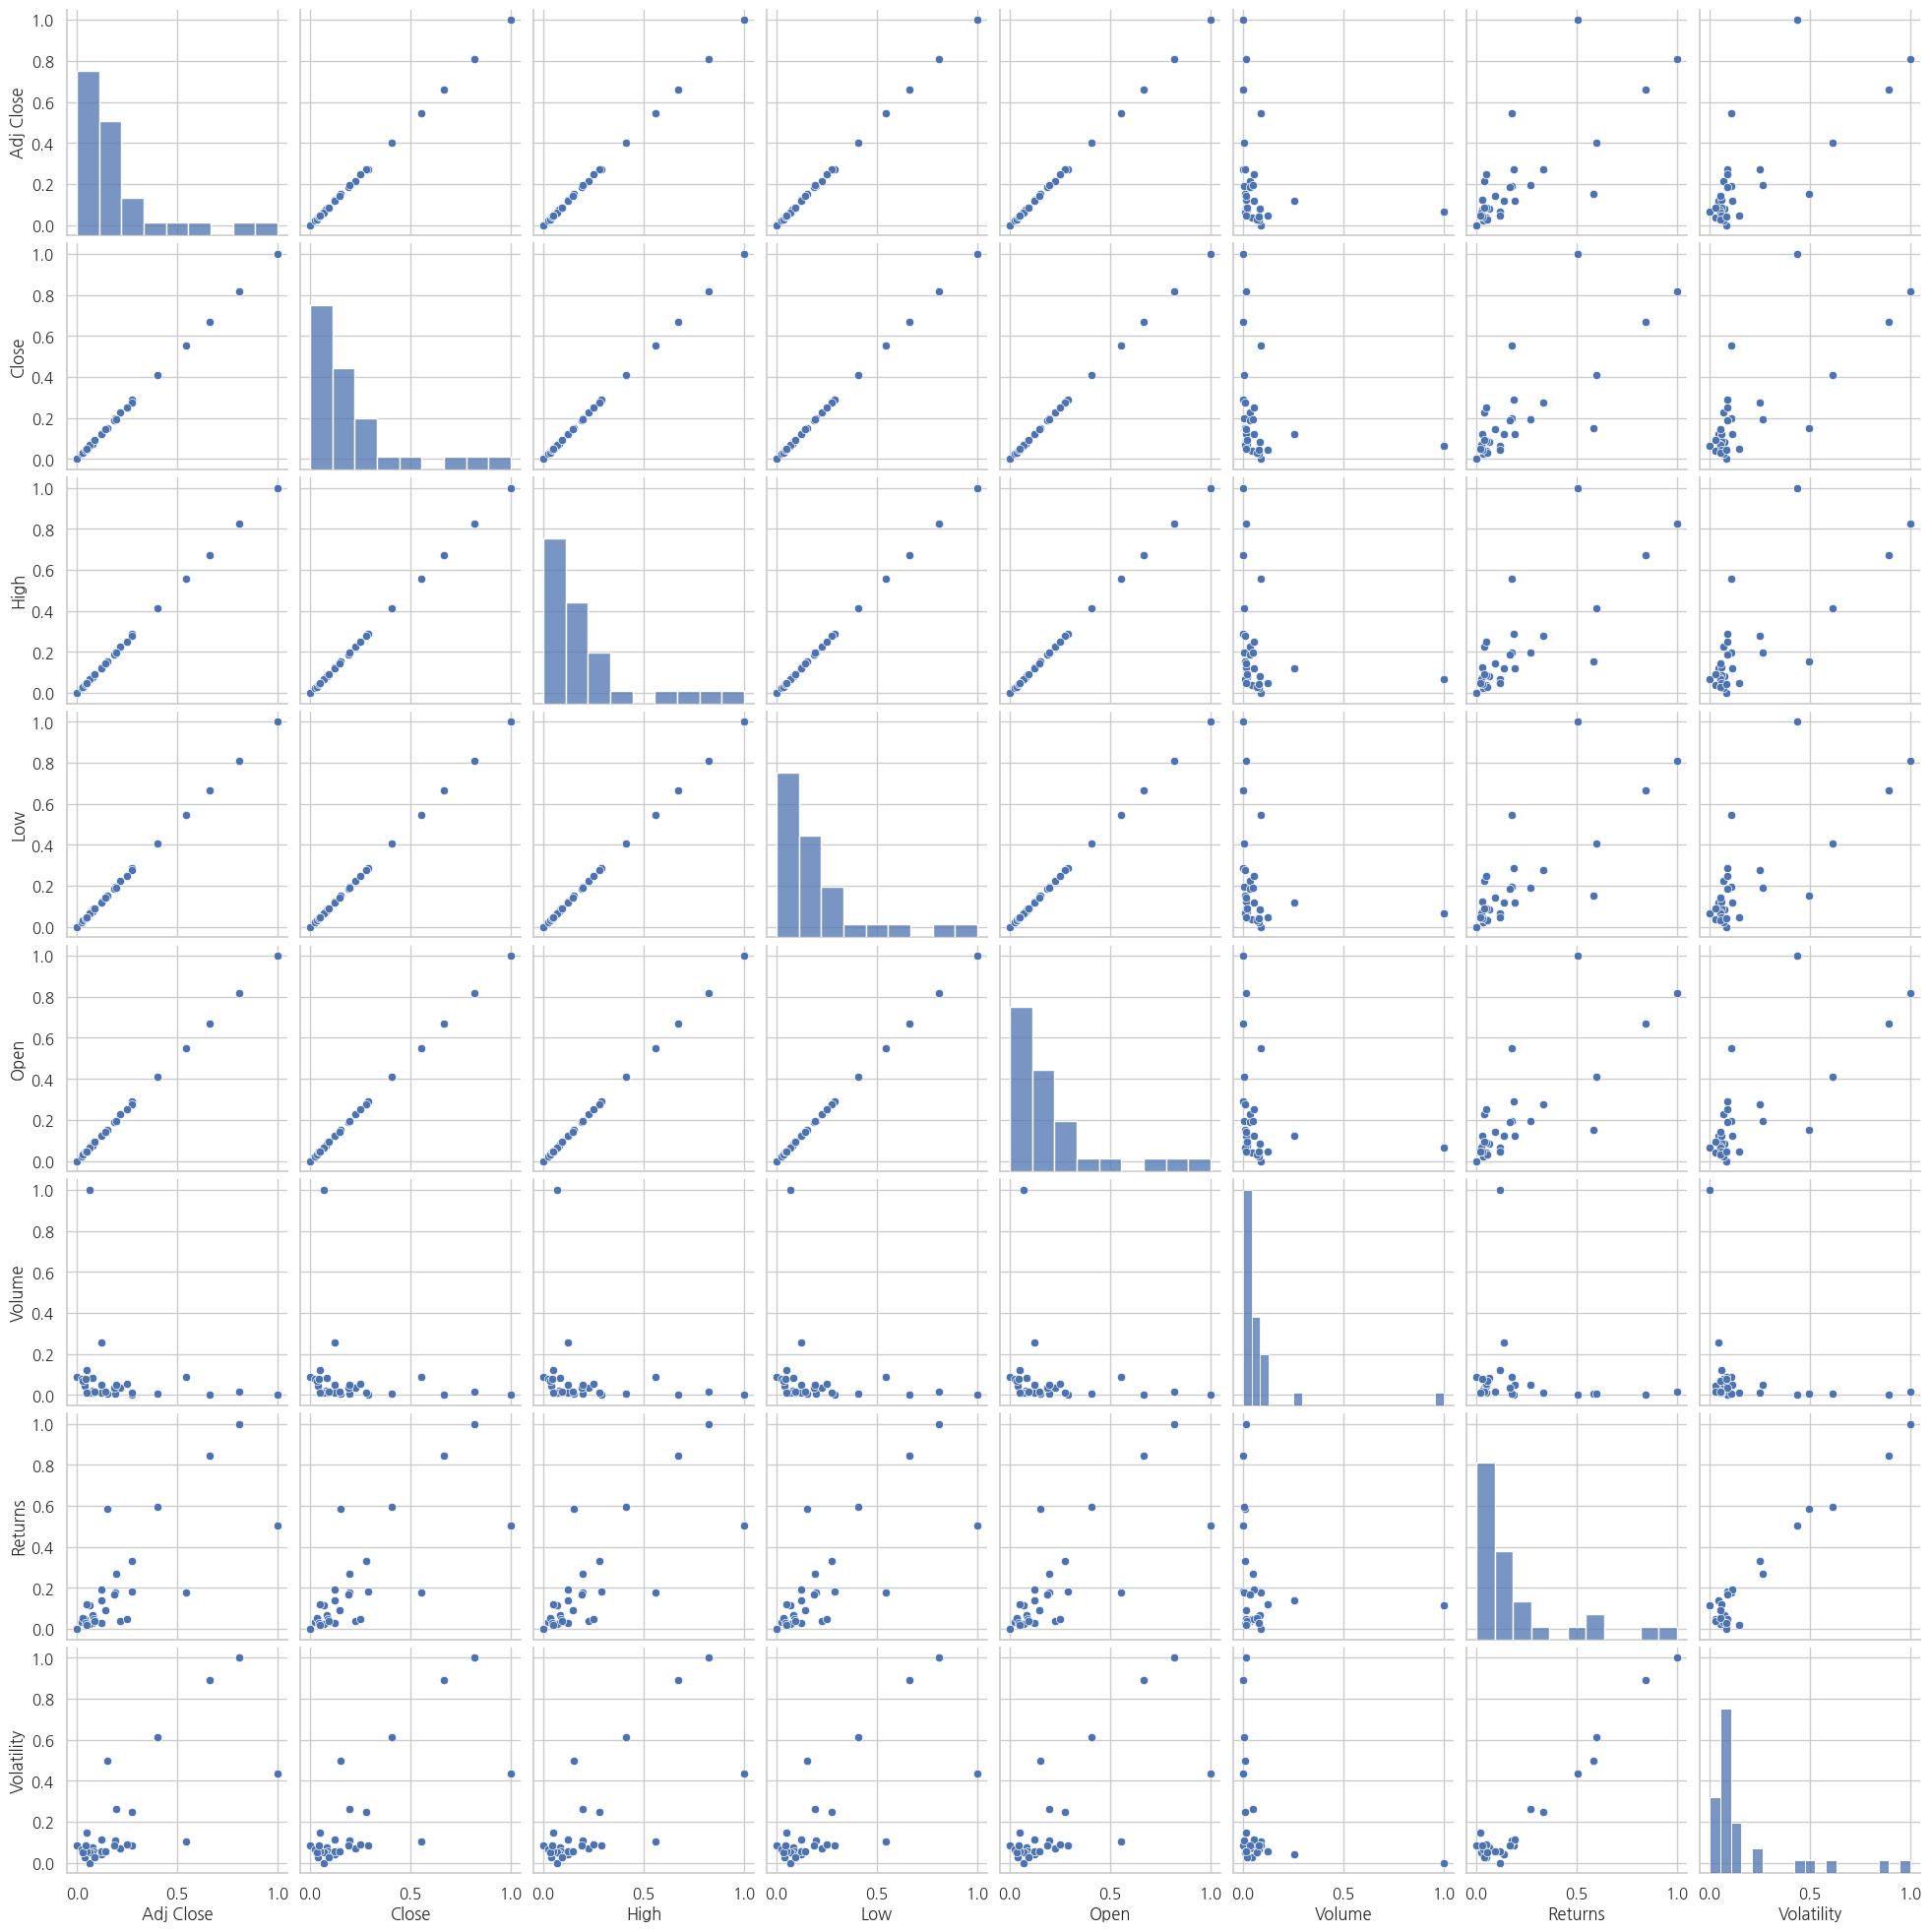

In [ ]:
sns.pairplot(grouped_data[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume','Returns','Volatility']])
plt.show()

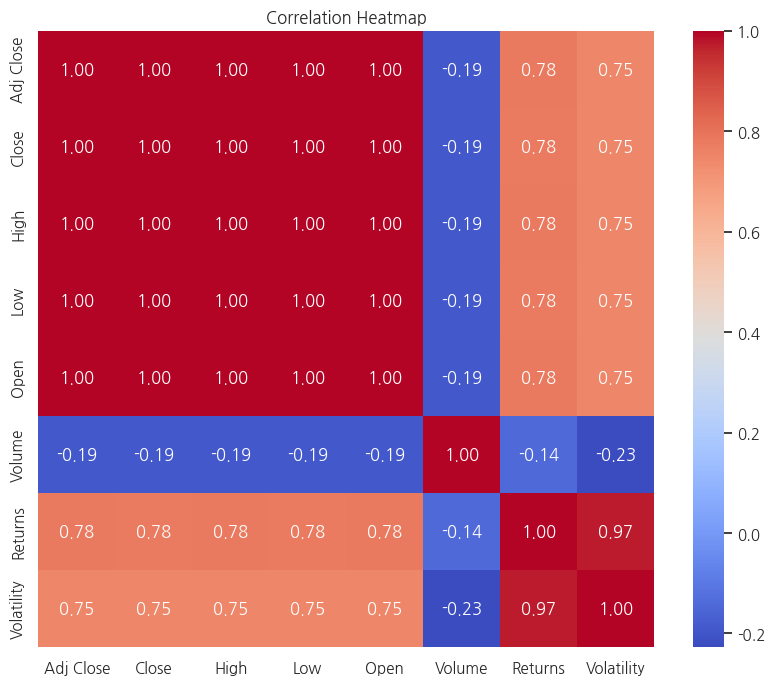

Adj Close   Adj Close     1.000000
Close       Close         1.000000
Returns     Returns       1.000000
Volume      Volume        1.000000
Open        Open          1.000000
                            ...   
Volume      Close        -0.192657
High        Volume       -0.192700
Volume      High         -0.192700
            Volatility   -0.226580
Volatility  Volume       -0.226580
Length: 64, dtype: float64


In [ ]:
# 정확한 수치를 계산하기 위해 상관관계 행렬 계산
correlation_matrix = grouped_data[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'Returns','Volatility']].corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()

# 가장 상관관계가 높은 변수 확인
highest_correlation = correlation_matrix.unstack().sort_values(ascending=False)
print(highest_correlation)

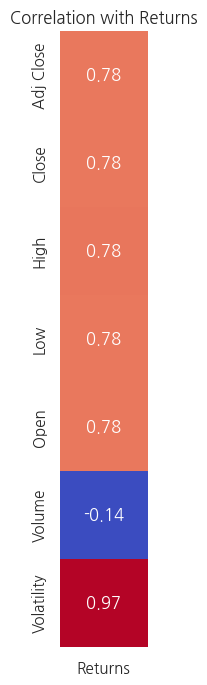

Volatility    0.971605
High          0.780841
Open          0.779970
Adj Close     0.779824
Close         0.779568
Low           0.778697
Volume        0.143357
Name: Returns, dtype: float64


In [ ]:
# 정확한 수치를 계산하기 위해 상관관계 행렬 계산
correlation_matrix = grouped_data[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'Returns','Volatility']].corr()

# Returns와의 상관관계만 추출
returns_correlation = correlation_matrix['Returns'].drop('Returns')

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(returns_correlation.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar=False)
plt.title('Correlation with Returns')
plt.show()

# 가장 상관관계가 높은 변수 확인
highest_correlation = returns_correlation.abs().sort_values(ascending=False)
print(highest_correlation)


4. 두 개의 변수를 기준으로 K-Means와 DBSCAN을 모두 활용하여 클러스터링합니다. 두 클러스터 중 어떤 클러스터를 선택할 것인지 결정합니다.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [ ]:
#DBSCAN 모델

df = df.dropna()
cluster = DBSCAN(eps = 3)
label = cluster.fit_predict(df[['Returns','Volatility']])
df['Cluster'] = label

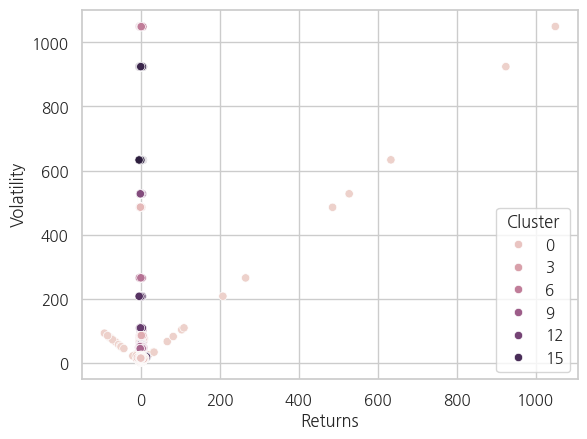

In [ ]:
sns.scatterplot(x='Returns', y='Volatility', data = df, hue = 'Cluster')
plt.show()

In [ ]:
#KMeans 모델
kmeans = KMeans(n_clusters = 3, random_state = 319, n_init = 'auto')
label = kmeans.fit_predict(df[['Returns', 'Volatility']])
df['Cluster'] = label

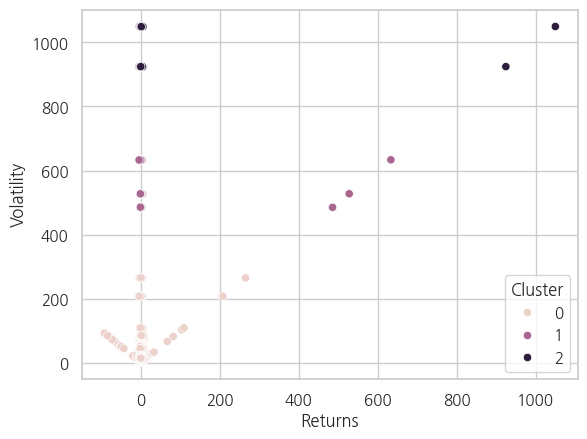

In [ ]:
sns.scatterplot(x='Returns', y = 'Volatility', hue = 'Cluster', data = df)
plt.show()

In [ ]:
# 클러스터에 어떤 기업이 포함되어 있을까?
cluster = 0
cluster_list = df[df['Cluster'] == cluster]['Name'].unique().tolist()

for name in cluster_list:
    print(name)

삼성전자
SK하이닉스
삼성바이오로직스
현대차
기아
셀트리온
POSCO홀딩스
NAVER
KB금융
LG화학
삼성물산
신한지주
카카오
현대모비스
삼성생명
하나금융지주
LG전자
삼성화재
한국전력
삼성에스디에스
LG
SK
KT&G
SK텔레콤
SK이노베이션
아모레퍼시픽
S-Oil
LG생활건강
넷마블
엔씨소프트


5. 클러스터별 기초 통계량을 구하고, seaborn boxplot으로 시각화합니다.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7310 entries, 40 to 7349
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Ticker      7310 non-null   object        
 1   Name        7310 non-null   object        
 2   Date        7310 non-null   datetime64[ns]
 3   Adj Close   7310 non-null   float64       
 4   Close       7310 non-null   float64       
 5   High        7310 non-null   float64       
 6   Low         7310 non-null   float64       
 7   Open        7310 non-null   float64       
 8   Volume      7310 non-null   int64         
 9   Returns     7310 non-null   float64       
 10  Volatility  7310 non-null   float64       
 11  Cluster     7310 non-null   int32         
dtypes: datetime64[ns](1), float64(7), int32(1), int64(1), object(2)
memory usage: 713.9+ KB
